In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('news_articles.csv')
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [6]:
df.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
df.count()

author                     2096
published                  2096
title                      2096
text                       2050
language                   2095
site_url                   2095
main_img_url               2095
type                       2095
label                      2095
title_without_stopwords    2094
text_without_stopwords     2046
hasImage                   2095
dtype: int64

In [8]:
df.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [9]:
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [10]:
df.replace(to_replace='', value=np.nan, inplace=True)

In [11]:
df.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [12]:
df.groupby('author').sum()


C:\Users\yener\AppData\Local\Temp\ipykernel_15392\871877586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('author').sum()


,hasImage
author,
# 1 NWO Hatr,3.0
-NO AUTHOR-,49.0
4 Goals For The Neomasculinity Movement During Trumps First Term,0.0
?????? ???? ???? ?????????,1.0
A. Griffee,2.0
...,...
watchmannonthewall,1.0
willz,1.0
wmw_admin,0.0


In [13]:
author_sums = df.groupby('author')['published'].count()
sorted_authors = author_sums.sort_values(ascending=False)
sorted_authors.head(25)

author
No Author                              505
Activist Post                           82
EdJenner                                73
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
-NO AUTHOR-                             58
Daniel Greenfield                       55
admin                                   48
Jason Easley                            45
Alex Ansary                             44
Dr. Patrick Slattery                    38
Henry Wolff                             33
Corbett                                 27
tokyowashi (noreply@blogger.com)        20
Mike Rivero                             17
Steve Watson                            16
Sarah Jones                             16
Roosh Valizadeh                         15
Hrafnkell Haraldsson                    15
Letsbereal                              13
Fed Up                                  12
ActivistPost                            12
Admin                                   11
ahtr

In [14]:
df.drop(['author','site_url','main_img_url','hasImage'], axis =1, inplace = True)


In [15]:
df.groupby('language').count()

,published,title,text,type,label,title_without_stopwords,text_without_stopwords
language,,,,,,,
english,2017,2017,1972,2017,2017,2016,1968
french,2,2,2,2,2,2,2
german,72,72,72,72,72,72,72
ignore,3,3,3,3,3,3,3
spanish,1,1,1,1,1,1,1


In [16]:
# Define a list of languages to remove
languages_to_remove = ['french', 'german', 'ignore', 'spanish']

# Filter out rows with the specified languages
df = df[~df['language'].isin(languages_to_remove)]

In [17]:
df.groupby('language').count()

,published,title,text,type,label,title_without_stopwords,text_without_stopwords
language,,,,,,,
english,2017,2017,1972,2017,2017,2016,1968


In [18]:
df

,published,title,text,language,type,label,title_without_stopwords,text_without_stopwords
0,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...
1,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...
2,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...
3,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...
4,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...
...,...,...,...,...,...,...,...,...
2091,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,bias,Real,good samaritan wearing indian headdress disarm...,NaN
2092,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,bias,Real,skype sex scam fortune built shame,NaN
2093,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN
2094,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,bs,Fake,title,NaN


In [19]:
df.groupby('type').sum()

,published,title,text,language,label,title_without_stopwords,text_without_stopwords
type,,,,,,,
bias,2016-10-26T21:41:00.000+03:002016-10-29T08:47:...,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,englishenglishenglishenglishenglishenglishengl...,RealRealRealRealRealRealRealRealRealRealRealRe...,muslims busted stole millions govt benefitsatt...,print pay back money plus interest entire fami...
bs,2016-10-27T06:14:00.000+03:002016-10-26T23:12:...,clinton prides a pig farm bridge serco zulu s...,so you have rothschild banksters and british v...,englishenglishenglishenglishenglishenglishengl...,FakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFa...,clinton prides pig farm bridge serco zulu serv...,rothschild banksters british voting machines r...
conspiracy,2016-10-27T02:24:00.000+03:002016-10-29T16:20:...,intl community still financing protecting terr...,st century wire says \nwire reported on friday...,englishenglishenglishenglishenglishenglishengl...,FakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFa...,intl community still financing protecting terr...,st century wire says wire reported friday fbis...
fake,2016-10-27T13:00:00.000+03:002016-11-11T12:00:...,the amish in america commit their vote to dona...,share president obama has signed an executive...,englishenglishenglishenglishenglishenglishengl...,FakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFa...,amish america commit vote donald trump mathema...,share president obama signed executive order d...
hate,2016-10-26T21:25:07.770+03:002016-10-26T21:25:...,dr david duke and dr slattery expose hillarys ...,watch dr dukes powerful new television commerc...,englishenglishenglishenglishenglishenglishengl...,RealRealRealRealRealRealRealRealRealRealRealRe...,dr david duke dr slattery expose hillarys trea...,watch dr dukes powerful new television commerc...
junksci,2016-10-27T23:17:33.552+03:002016-10-28T00:18:...,chart of the day what escape velocity core cap...,pomegranate pistachio pancakes \na glutenfree ...,englishenglishenglishenglishenglishenglishengl...,FakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFa...,geniuses schizophrenics pass question quiz dav...,posted october michael depinto anyone heard ye...
satire,2016-10-27T09:20:19.116+03:002016-10-27T01:45:...,they said what find out what miley cyrus alici...,email \nwhether or not youre a basketball fan ...,englishenglishenglishenglishenglishenglishengl...,FakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFakeFa...,said find miley cyrus alicia vikander zadie sm...,email whether youre basketball fan youre going...
state,2016-11-02T16:40:48.502+02:002016-11-02T16:41:...,donald trump begs hillary clinton early voters...,this handout picture released by the venezuela...,englishenglishenglishenglishenglishenglishengl...,RealRealRealRealRealRealRealRealRealRealRealRe...,tens thousands march venezuela governmentpress...,debate washingtons syria policy episode debate...


In [20]:
df.drop(['title','text','language'], axis=1, inplace=True)

In [21]:
df

,published,type,label,title_without_stopwords,text_without_stopwords
0,2016-10-26T21:41:00.000+03:00,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...
1,2016-10-29T08:47:11.259+03:00,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...
2,2016-10-31T01:41:49.479+02:00,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...
3,2016-11-01T05:22:00.000+02:00,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...
4,2016-11-01T21:56:00.000+02:00,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...
...,...,...,...,...,...
2091,2016-10-27T15:36:10.573+03:00,bias,Real,good samaritan wearing indian headdress disarm...,NaN
2092,2016-10-27T15:36:10.671+03:00,bias,Real,skype sex scam fortune built shame,NaN
2093,2016-10-27T13:30:00.000+03:00,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN
2094,2016-10-27T15:58:41.935+03:00,bs,Fake,title,NaN


In [22]:
df

,published,type,label,title_without_stopwords,text_without_stopwords
0,2016-10-26T21:41:00.000+03:00,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...
1,2016-10-29T08:47:11.259+03:00,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...
2,2016-10-31T01:41:49.479+02:00,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...
3,2016-11-01T05:22:00.000+02:00,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...
4,2016-11-01T21:56:00.000+02:00,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...
...,...,...,...,...,...
2091,2016-10-27T15:36:10.573+03:00,bias,Real,good samaritan wearing indian headdress disarm...,NaN
2092,2016-10-27T15:36:10.671+03:00,bias,Real,skype sex scam fortune built shame,NaN
2093,2016-10-27T13:30:00.000+03:00,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN
2094,2016-10-27T15:58:41.935+03:00,bs,Fake,title,NaN


In [23]:
df.groupby('type').count()


,published,label,title_without_stopwords,text_without_stopwords
type,,,,
bias,436,436,436,389
bs,527,527,526,525
conspiracy,430,430,430,430
fake,15,15,15,15
hate,241,241,241,241
junksci,102,102,102,102
satire,146,146,146,146
state,120,120,120,120


In [24]:
df.groupby('label').count()

,published,type,title_without_stopwords,text_without_stopwords
label,,,,
Fake,1220,1220,1219,1218
Real,797,797,797,750


In [25]:
df.drop(['published'], axis=1, inplace=True)

In [26]:
df

,type,label,title_without_stopwords,text_without_stopwords
0,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...
1,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...
2,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...
3,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...
4,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...
...,...,...,...,...
2091,bias,Real,good samaritan wearing indian headdress disarm...,NaN
2092,bias,Real,skype sex scam fortune built shame,NaN
2093,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN
2094,bs,Fake,title,NaN


In [27]:
df.fillna('', inplace=True)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text_without_stopwords'],df['label'], test_size=0.2, random_state=42)

In [29]:
vectoriser = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectoriser.fit_transform(X_train)
X_test_vectorised = vectoriser.transform(X_test)


In [30]:
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

LogisticRegression()

In [31]:
accuracy = model.score(X_test_vectorised, y_test)
print('Test Accuracy', accuracy)

Test Accuracy 0.7103960396039604


In [32]:
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text_without_stopwords'])

# Train a LDA model on the vectorized text data
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Get the topics and top words for each topic
for i, topic in enumerate(lda.components_):
    print(f'Topic {i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic 0:
['kilometers', 'agreed', 'iraqs', 'toosi', 'militants', 'jasta', 'missile', 'daesh', 'iraqi', 'mosul']
Topic 1:
['explanation', 'aleppo', 'clears', 'podcast', 'houthi', 'pkk', 'missile', 'pardon', 'yemen', 'danney']
Topic 2:
['copyright', 'reserved', 'aig', 'asis', 'doom', 'bloom', 'assaf', 'clickhole', 'notify', 'biden']
Topic 3:
['cremtine', 'goodbye', 'armani', 'vin', 'saints', 'cuba', 'pitt', 'internet', 'liar', 'gruber']
Topic 4:
['flip', 'infowars', 'activation', 'httpwwwinfowarscomwpcontentuploadsbrainforceejpg', 'supercharge', 'neural', 'force', 'pipeline', 'brain', 'httpwwwinfowarsstorecomhealthandwellnessinfowarslifebrainforcehtmlimstzrwuutm_campaigninfowarsplacementutm_sourceinfowarscomutm_mediumwidgetutm_contentbrainforce']
Topic 5:
['trejo', 'lavrov', 'abbey', 'laraine', 'zarif', 'admiral', 'extradition', 'births', 'aleppo', 'serco']
Topic 6:
['infrmants', 'httpwwwopborgnewsseriesburnsoregonstandoffbundymilitianewsupdatesammonbundyverdictoregonstandoffmalheurcourt

In [33]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load and preprocess data
X_train, X_test, y_train, y_test = train_test_split(df['text_without_stopwords'],df['type'], test_size=0.2, random_state=42)

# Create and fit the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)

# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Save the vectorizer and the model
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(clf, 'model.joblib')

['model.joblib']

In [34]:


# Load the vectorizer and the model
vectorizer = joblib.load('vectorizer.joblib')
clf = joblib.load('model.joblib')

input_text = input('Enter some text here please: ')

# Transform the input text using the vectorizer
input_text_vec = vectorizer.transform([input_text])

# Make a prediction using the model
X_new = vectoriser.transform([input_text])

prediction1 = model.predict(X_new)
prediction2 = clf.predict(input_text_vec)

# Print the predicted label
print(input_text)
print("Label: ", prediction1)
print("Type: ",  prediction2)


turkish
Label:  ['Fake']
Type:  ['bs']


In [35]:
type_sums = df.groupby('type')['label'].count()
sorted_authors = type_sums.sort_values(ascending=False)
sorted_authors

type
bs            527
bias          436
conspiracy    430
hate          241
satire        146
state         120
junksci       102
fake           15
                1
Name: label, dtype: int64

In [36]:
label_sums = df.groupby('label')['type'].count()
sorted_authors = label_sums.sort_values(ascending=False)
sorted_authors

label
Fake    1220
Real     797
           1
Name: type, dtype: int64

In [84]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
from PIL import Image

In [64]:
text = ' '.join(df['text_without_stopwords'].astype(str).tolist())


In [104]:
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(stopwords.words('english')), min_font_size=10).generate(text)

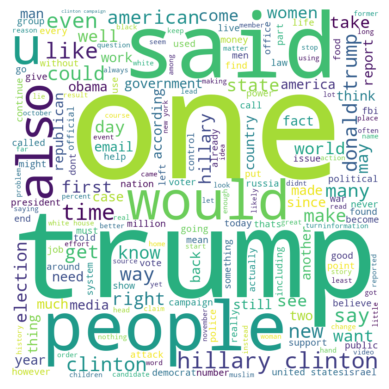

In [105]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()